# A Simple CNN Tutorial with App.
**Benan AKCA** <a id="0"></a>

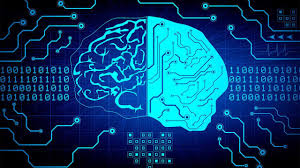

1. [__INTRODUCTION__](#1)
    
2. [__CONVOLUTIONAL NEURAL NETWORKS__](#100)
    1. [__Convolution Layer__](#110)
        * [Steps of Convolution Operation](#111)
        * [Stride](#112)
        * [An Example of Convolution Operation](#113)
        * [Why Do We Use Filters?](#114)       
    2. [__Padding__](#130)
        * [Why do we use Padding?](#131)
        * [Equation of Calculating Output Dimension](#132)
        * [Types of Padding in Keras](#133)
    3. [__Pooling Layer__](#150)
        * [Hyper Parameters of Pooling Operation](#151)
        * [Why do we use Pooling?](#152)
        * [Types of Pooling in Keras](#153)
    4. [__Batch Normalization Layer__](#160)
    5. [__Drop Out Layer__](#180)
    
3. [__APPLICATION WITH CNN__](#200)
    1. [__Import Modules__](#210)
    2. [__Understanding the Data__](#220)
    3. [__Data Preprocessing__](#230)
        * [Normalizing the Data](#231)
        * [Train and Test Splitting](#232)
        * [Reshape Data to Appropriate Sizes ](#233)
    4. [__Building and Training a CNN Model__](#250)  
        * [Model - Build](#251)
        * [Model - Compile](#252)
            * [Categorical Cross Entropy](#253)
            * [Optimizer](#255)
            * [On-the-Fly Data Augmentation](#257)
        * [Model - Fit](#259)
    5. [__Evaluation of the Model__](#270) 
        * [Accuracy and Loss Curves](#271) * 
        * [Test Set Accuracy Score](#272)
        * [Confusion Matrix](#273)
        * [F1 Score Calculation](#274)
        * [Evaluate with Another Dataset](#275)
        * [Submit for Competition](#275)
6. [__CONCLUSION__](#290)

# ** 1. Introduction** <a id="1"></a>
<mark>[Return Contents](#0)
    
* Hello everyone, first of all, I am pleased to present this work to you. This kernel was prepared within the scope of handwriting recognition contest using the Kannada MNIST data set and in the competition, it managed to be among the __top 2%__. 
* Without further ado, I would like to give you brief information about the content of the study.

This study consists of two main parts. 

1. Basic Theoretical Knowledge; 

   * Causal approaches,
   * Visual expression
   * Answers of the questions that may arise in your mind about CNN.
   
   
2. Practicing with an Application;

   * Handwriting recognition with the Kannada handwritten digits dataset which is different than the MNIST handwritten digits dataset.   
   * In the application part, I also gave some theoretical information with visual details according to the necessity.
  
  
  
  <font color='green'>
    
#### If you will find it useful, I would appreciate it if you upvote.
#### Then let's begin...
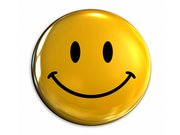


# ** 2. Convolutional Neural Networks** <a id="100"></a>
<mark>[Return Contents](#0)

* In Deep Learning, Convolutional Neural Network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.
* It has applications in image and video recognition, recommender systems, image classification, medical image analysis, and natural language processing
* The name “Convolutional Neural Network” indicates that the network employs a mathematical operation called convolution. Convolution is a specialized kind of linear operation. Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers
* A convolutional neural network consists of one or several convolutional layers, followed by some fully connected layers of neurons like in classical multilayer feedforward neural networks.
* The hidden layers of a CNN typically consist of convolutional layers, pooling layers, fully connected layers and normalization layers. 

## **Convolution Operation** <a id="110"></a>
<mark>[Return Contents](#0)

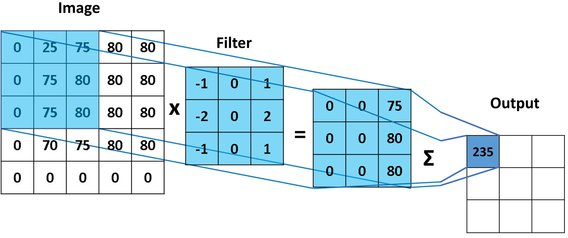
* You can think of left one as the “input” signal (or image), and the other (called the kernel) as a “filter” on the input image, producing an output image (so convolution takes two matrix as input and produces a third as output). 

#### **Steps of convulation operation** <a id="111"></a> 
1. Take the element wise production of the upper left corner sub-matrix and filter
2. Then sum all row and column to obtain a single value
3. Result is the upper corner cell's value of your new output matrix. (output(0,0))
4. After that, slide the filter over "S" column on main image and do the same thing. You have your output(0,1) value.

#### **Stride** <a id="112"></a>
* Sliding amount is declared by stride (S) constant. 
* According to problem stride content may vary change and this will directly effect on output dimensions.
* Calculation of output matrix dimension for $l$'th layer:
\begin{equation}
n^{l} = \frac{n^{l-1} - f}{s}+1 \\
\text{output} =  n^l x n^l
\end{equation}
Where;
 * $l$ demonstrates the layer number.
 * $n^{l}$ is the horizontal/vertical dimension of output matrix.
 * $n^{l-1}$ is the horizontal/vertical dimension of input matrix.
 * $f$ is the horizontal/vertical dimension of filter (kernel) matrix.
 * $s$ is the stride constant. Using for determine how many columns will kernel shift to right side in order to calculate output matrixes next cell.

### **An Example of Convolution Operation** <a id="113"></a>
<mark>[Return Contents](#0)
    
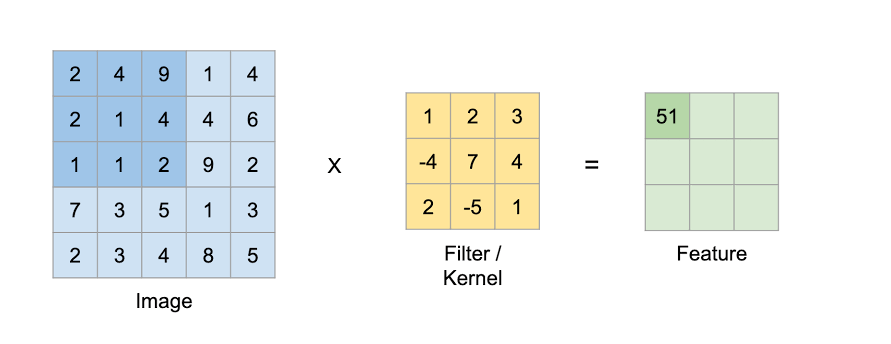
* As you see above we have 5x5 image matrix and 3x3 filter matrix,
* If we choose the stride (S) parameter as 1 then our output matrix would be 3x3 matrix
* If we choose the stride (S) parameter as 2 then our output matrix would be 2x2 matrix

\begin{equation}
n^{l} = \frac{5 - 3}{1}+1 = 3\\
\text{output} =  3 x 3\\
\text{  }\\
n^{l} = \frac{5 - 3}{2}+1 = 2\\
\text{output} =  2 x 2\\
\end{equation}

* If the entrance picture is colored (RGB) as below, the 2nd and 3rd dimensions will also be available. (6x6x3)
* In this case, we will convolute the filter 1 to have three different values from 3 channels and will sum the results to obtain a single number.
* The important factor in here is filter1 has the same values for all three-channel (demonstrated as different colors) he has.
* On the example above we use only one filter but in real applications, there will be more filters used at the same time as below.
* The output matrix width(w) and height(h) sizes are generally the same in applications but it can be different also.
* So output images are a matrix in $w$x$h$x$c$ dimension.
* $w$ and $h$ is calculated as above equation and the channel dimension of the matrix is the same as filter number used on convolution. You can imagine that after the convolution operation each filter creates a different layer on the matrix as below.

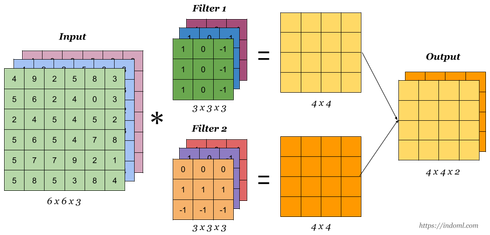

### **Why do we use Filters?** <a id="114"></a>
<mark>[Return Contents](#0)
* To answer this question first we should ask another and more general question;
* What is our main purpose?
* In this kernel our main purpose is as you know recognition handwrite patterns, but for simplicity, let us think about cats.
* When you see a cat face picture how do you understand that is a cat? It should have solid patterns on its face right? 
   * Solid patterns like eye shape, nose curve, mustaches, etc.
   * Our brain recognizes some parts of the face separately and combines them to give a final decision. The same explanation is acceptable for CNN filters.
* Each filter has a job; some of them detect the edges (Sobel filter as on the example), some of them detect just the horizontal lines. 
* The task of the filter becomes more complex in the deep layers of the evolutionary network. For example, the first layer of the network can detect just __horizontal lines__ while deeper layers of the network __can detect the nose or eye__ and again ongoing deeper layers __can detect even the human face.__
* To sum up filters are used to extract the features of the image. After feature extraction, we use a fully connected layer for classification according to extracted features.



## **Padding** <a id="130"></a>
<mark>[Return Contents](#0)

    

##### Padding refers to the process of symmetrically adding values to the input matrix. 

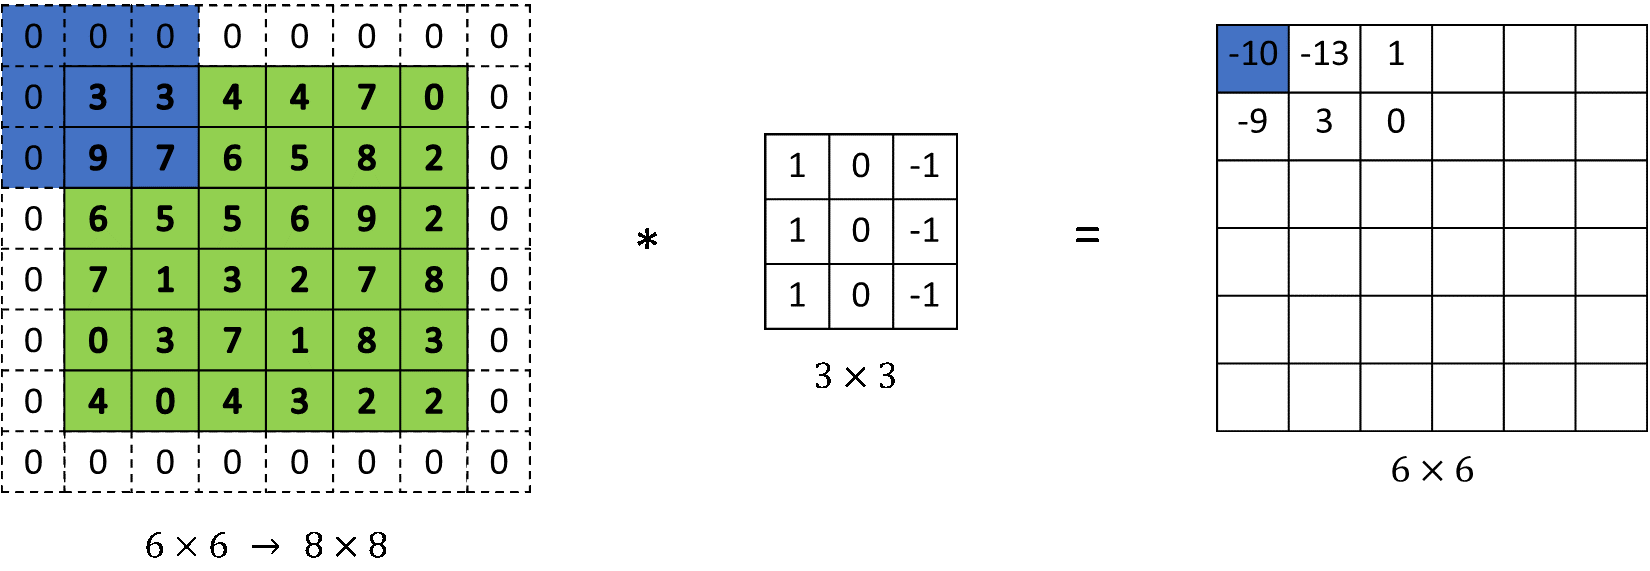

### **__Why do we use Padding?__** <a id="131"></a>
<mark>[Return Contents](#0)    
1. The information at the edges is convoluted only once, while the information in the middle is convoluted 3 times with a 3x3 filter. This results in the loss of information on the edges. Edge information can be convoluted multiple times thanks to padding.
2. The output matrix dimension getting smaller whenever we use convolution operation. Padding mostly used in designing the CNN layers when the dimensions of the input volume need to be preserved in the output volume (**Same Padding**).
    
### Equation of calculating output dimension changes with using padding process as below <a id="132"></a>

\begin{equation}
n^{l} = \frac{n^{l-1} + 2p - f}{s}+1 \\
\text{output} =  n^l x n^l
\end{equation}


### **Types of Padding in Keras** <a id="133"></a> 
<mark>[Return Contents](#0)  
* Valid : No padding
* Same  : Choosing a $p$ value on above equation to obtain output matrix in same dimension as like input matrix.

## **Pooling** <a id="150"></a>
<mark>[Return Contents](#0)

* Pooling refers to the process of dividing a matrix into pools and select from every pool only one value as representing that pool.
* Despite the convolution operation Pooling has not any weight because you don't use any filter to operation.
* It is about only selecting one value from small groups.

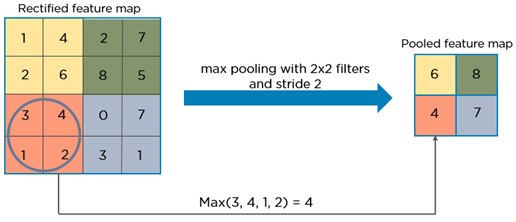

### **Hyper Parameters of Pooling Operation** <a id="151"></a>
1. Pooling Size
2. Stride

* Same as convolution operation, for example in the above pic. there is $2$x$2$ pooling size and stride = 2 (sliding on matrix by 2 cell)

### **Why do we use Pooling?** <a id="152"></a>
<mark>[Return Contents](#0)
1. To gain robustness on feature extraction;
    * Pooling prevents the model from over-training by discarding the unnecessary data relative to the selected value.
2. To speed up the computation;
    * Reducing the size of the representation for increasing the speed of the computation.

### **Types of Pooling in Keras** <a id="153"></a>
<mark>[Return Contents](#0)
    
* Max Pooling: The operation of selecting the maximum value from each mini-group (pool) as the picture above
* Average Pooling: The operation of selecting the average value from each mini-group.

<a href="https://ibb.co/sFVGBpY"><img src="https://i.ibb.co/xM704KT/cnn.jpg" alt="cnn" border="0"></a>

  1. Filter Matrices containing a specific pattern
  2. In the Conv layer, the filters are shifted over the image by the number of strides and convolution is performed.
  3. The matrix obtained as a result of the 3rd process is called a feature map. Here it can be observed in which regions of the matrix in the previous layer how much data is available for the filter pattern.
  4. Numerically high values are indicative of pattern compliance.
  5. A feature map can be considered as the new picture we have for the next CNN layer. We can now detect the patterns in this picture with a new filter. This is the 2nd layer of CNN. We can increase the number of layers with this logic.

## **Batch Normalization** <a id="160"></a>
<mark>[Return Contents](#0)

#### **What is Batch Norm?** <a id="161"></a>
<mark>[Return Contents](#0)
    
* Batch Normalization is a method used to normalize the input of a hidden layer by adjusting and scaling the activations.
* The method consists of performing normalization on each neuron of a specific layer on each training mini-batch.
* Normalized neurons of $l$'th layer will have a specific mean and variance for the problem according to trained $\gamma$ and $\beta$ parameters.
* The algorithm of the batch norm is shown below;

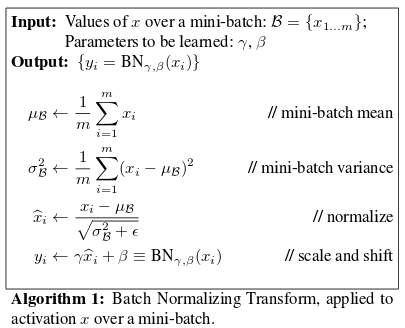

#### **Why do we use Batch Norm?** <a id="161"></a>
<mark>[Return Contents](#0)
    
* At artificial neural networks distribution of the inputs changes for each layer during training since the weight parameters of the previous layers change. This slows down training by requiring lower learning rates and careful parameter initialization, making it difficult to train models with non-linear saturation.
* In short terms we use Batch Norm;
    1. To increase the learning speed of the model.
    2. To use much higher learning rates and be less careful about initialization
    3. To regularize the network (side positive effect)

#### **Some notes about Batch Norm** <a id="162"></a>
<mark>[Return Contents](#0)
    
* The parameters $\gamma$ and $\beta$ are learnable parameters. Therefore, you just initialize them and with backpropagation or other optimization algorithm they will be optimized like weight parameters.
* Changing the distribution of each layer’s inputs during training, because of the enhancement of parameters of the previous layers calling covariate shifting at the original paper.
* You can read the original paper written by Sergey Ioffe and Christian Szegedy from [here](https://arxiv.org/pdf/1502.03167.pdf).

## **Drop Out** <a id="180"></a>
<mark>[Return Contents](#0)

* Drop out is an effective regularization method.
* During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.
* __Why do we use Drop Out?__ The answer is to prevent overfitting...
* It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer.

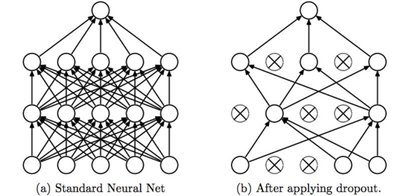

![CNN.png](https://i.ibb.co/Qcb9y35/Types-of-Learning-in-Machine-Learning.jpg)

# ** 3. An Image Classification Application with CNN** <a id="200"></a>
<mark>[Return Contents](#0)
<hr>

## **Import Modules** <a id="210"></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D,LeakyReLU
from tensorflow.keras.optimizers import RMSprop,Nadam,Adadelta
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

* With this code below you can check if the kernel use GPU or not.

In [ ]:
tf.test.gpu_device_name()

## **Understanding the Data** <a id="220"></a>
<mark>[Return Contents](#0)

* We have training and test set CSV files,
* In order to evaluate the generalization skill of the model we will split our training set into training and validation sets.
* After training the data, Kaggle will evaluate the final performance of our data with test set predictions.

* Let's read csv files

In [ ]:
raw_train = pd.read_csv('../input/Kannada-MNIST/train.csv')
raw_test = pd.read_csv('../input/Kannada-MNIST/test.csv')

* We have $28$x$28$ dimension handwritten pics.
* Dataset has been already flattened and has 784-pixel values for each pic.
* Totaly we have $60000$ pics in training set.

In [ ]:
raw_train.iloc[[0,-1],[1,-1]] # First and last values of dataset

* It is important to know the distribution of data according to the labels they have.
* This data set is __homogeneously__ distributed as you see below.

In [ ]:
num = raw_train.label.value_counts()
sns.barplot(num.index,num)
numbers = num.index.values

* __If the data wasn't homogeneously__ distributed what would we do?
    1. Then we could use data augmentation techniques to generate new data for low quantity labels,
    2. Or if we have enough data we can discard some high quantity labels

#### **Image of Handwritten Character** <a id="2"></a>
<mark>[Return Contents](#0)
<hr>
    
 * An overview of a picture
 * You can change the $num$ variable to see other numbers.

In [ ]:
num=6
number = raw_train.iloc[num,1:].values.reshape(28,28)
print("Picture of "+ str(num) + "in Kannada style")
plt.imshow(number, cmap=plt.get_cmap('gray'))
plt.show()


## **Data Preprocessing** <a id="230"></a>
### **Normalizing Data** <a id="231"></a>
<mark>[Return Contents](#0)
<hr>
* What is normalizing? Normalization means that adjusting values measured on different scales to a notionally common scale.
* Why should you normalize the data?  With a normalized data weight values reach optimum value faster.
* On image processing applications generally we normalize data to 0-1 scale with dividing data to 255.
* Because each pixel in every sample of training set has integer values from 0 to 255.
* In order to normalize training set data, we need to convert x to float type.

In [ ]:
x = raw_train.iloc[:, 1:].values.astype('float32') / 255
y = raw_train.iloc[:, 0] # labels

### **Cross Validation - Training- Validation Set Split** <a id="232"></a>
<mark>[Return Contents](#0)
    
* In order to measure the generalization ability of the model, we train the data with the training set and make the model arrangement according to the error value in the validation set. In addition, we determine the final performance of the model with the test set. 
* The reason for using the test set on the final evaluation is the model would have a bias on the validation set because we developed the model according to the validation set performance. So a kind of overfitting on the validation set is formed.
* This Kernel is prepared on a Kaggle competition dataset. They give us a training set for training the model and a test set without labels for prediction. As we don't have the labels we don't know the final performance of the test set until we submit our predictions.
* To evaluate the model we need to split our training set into training and validation set.
    
* For I prefer to split
    * Training set - $\%80$
    * Validation set - $\%20$


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.2, random_state=42) 

### **Reshape Data to Fit Model** <a id="233"></a>
<mark>[Return Contents](#0)

> * In order to feed the CNN model we need to reshape our $54000$x$784$ flatten image data to $54000$x$28$x$28$x$1$ dimensions.;

In [ ]:
x_train.shape

In [ ]:
x_train = x_train.reshape(-1, 28, 28,1)
x_val = x_val.reshape(-1, 28, 28,1)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

* You can leave one unknown dimension as -1.
* Whenever numpy has -1 value on reshape method it will calculate the dimension which denoted with -1 automatically.

## **Building and Training a CNN Model** <a id="250"></a>
<mark>[Return Contents](#0)
<hr>
* On Keras Sequential Networks there is three-stage for training building, compiling and fitting the model.
    
#### **Model - Build** <a id="251"></a>

    
* On building stage you specify the architecture of the model mainly.
* You can decide the [Filter](#110) size and [Padding](#150) type you will use on [Convolution](#110) operations and add [Pooling](#150), Batch Normalization, Dropout, activation function layers with build section.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(64,  (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(128, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),    
    
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Conv2D(256, (3,3), padding='same'),
    tf.keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5, gamma_initializer="uniform"),##
    tf.keras.layers.LeakyReLU(alpha=0.1),

    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256),
    tf.keras.layers.LeakyReLU(alpha=0.1),
 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

### **Model - Compile** <a id="252"></a>
<mark>[Return Contents](#0)
    
* On Compile Section we specify the loss function, optimizer algorithm and metric to use for evaluating the model.

In [ ]:
optimizer = RMSprop(learning_rate=0.002,###########optimizer = RMSprop(learning_rate=0.0025,###########
    rho=0.9,
    momentum=0.1,
    epsilon=1e-07,
    centered=True,
    name='RMSprop')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

#### **Compile ->Loss Function ->Categorical Crossentropy** <a id="253"></a>
<mark>[Return Contents](#0)
    
* The Categorical Crossentropy Loss Function computes between network predictions and target values for multiclass classification problems.

* The loss is calculated using the following formula;
\begin{equation}
Loss = -\frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{K} Y^i_klog(\hat{Y^i_k})(1-Y^i_k)log(1-\hat{Y^i_k}) \\
\end{equation}

where $k$ demonstrates class, $i$ demonstrates sample number, $\hat{Y_c}$ is the predicted value, $Y_c$ is the ground truth value, $m$ is the sample number in a batch and $K$ is the total number of classes.

* Why do we use log? Because cross-entropy function penalize bigger difference more and smaller difference less as mentioned below.

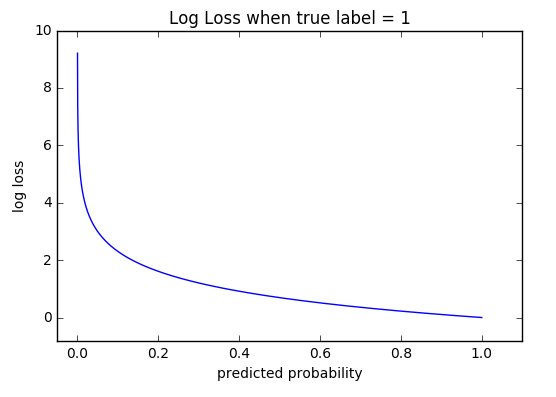

#### **Compile -> Optimizer** <a id="255"></a>
<mark>[Return Contents](#0)
* To optimize the weight values of the network we should choose an optimizer algorithm. 
* In the first lessons of artificial learning, the gradient descent algorithm is taught as the optimization algorithm used in backpropagation. 
* Over time, the gradient descent algorithm was developed and the algorithms that achieved faster and more accurate results were obtained. 
* Some of them are ADAGRAD, ADAM, ADAMAX, NADAM and RMSPROP. 
* These algorithms use techniques such as adaptive learning rate and momentum to achieve the global minimum.
* If you want to take a more detailed look at Gradient Descent algorithms, [here](https://ruder.io/optimizing-gradient-descent/) is a very nice overview article written by [Sebastian Ruder](https://ruder.io/optimizing-gradient-descent/).

* __As you see below__ while Stochastic Gradient Descent (SGD) which is a basic gradient descent algorithm cannot escape the saddle point, more advanced algorithms escape the saddle point __at different speeds.__


![CNN.jpg](https://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif)
![CNN.jpg](https://ruder.io/content/images/2016/09/contours_evaluation_optimizers.gif)

In [ ]:
batch_size = 1024
num_classes = 10
epochs = 40


#### **On-the-Fly Data Augmentation** <a id="257"></a>
<mark>[Return Contents](#0)
* On classification tasks on image datasets data augmentation is a common way to increase the generalization of the model. 



* With the ImageDataGenerator on Keras, we can handle this objective easily.
* [Here](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/) is a comprehensive and inspiring article about data augmentation and ImageDataGenerator written by [Adrian Rosebrock](https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/) who is the author of PyImageSearch a very instructive web-site about computer vision.
* __By changing__ some of the properties of the image from the code below, __you can observe what changes are happening in the dataset__. 
* With this observation, you can roughly specify the range you should choose.

In [ ]:
# An observation code for our dataset
datagen_try = ImageDataGenerator(rotation_range=15,
                             width_shift_range = 0.15,
                             height_shift_range = 0.15,
                             shear_range = 0.15,
                             zoom_range = 0.4,)
# fit parameters from data
datagen_try.fit(x_train)
# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen_try.flow(x_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(x_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [ ]:
datagen_train = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.25,
                                   height_shift_range = 0.25,
                                   shear_range = 0.1,
                                   zoom_range = 0.4,
                                   horizontal_flip = False)

datagen_val = ImageDataGenerator() 


step_train = x_train.shape[0] // batch_size
step_val = x_val.shape[0] // batch_size

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau( 
    monitor='loss',    # Quantity to be monitored.
    factor=0.25,       # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=2,        # The number of epochs with no improvement after which learning rate will be reduced.
    verbose=1,         # 0: quiet - 1: update messages.
    mode="auto",       # {auto, min, max}. In min mode, lr will be reduced when the quantity monitored has stopped decreasing; 
                       # in the max mode it will be reduced when the quantity monitored has stopped increasing; 
                       # in auto mode, the direction is automatically inferred from the name of the monitored quantity.
    min_delta=0.0001,  # threshold for measuring the new optimum, to only focus on significant changes.
    cooldown=0,        # number of epochs to wait before resuming normal operation after learning rate (lr) has been reduced.
    min_lr=0.00001     # lower bound on the learning rate.
    )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

### **Model - Fit** <a id="259"></a>
<mark>[Return Contents](#0)

In [ ]:
history = model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                              steps_per_epoch=len(x_train)//batch_size,
                              epochs=epochs,
                              validation_data=(x_val, y_val),
                              validation_steps=50,
                              callbacks=[learning_rate_reduction, es],
                              verbose=2)

## **Evaluation of the Model** <a id="270"></a>
### **Accuracy and Loss Curves** <a id="271"></a>
<mark>[Return Contents](#0)

* On classification, accuracy metric is calculated as below;

\begin{equation}
classification~accuracy = \frac{correct~predictions}{total~predictions} * 100 \\
\end{equation}

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Test Set Accuracy Score** <a id="272"></a>
<mark>[Return Contents](#0)

In [ ]:
model.evaluate(x_val, y_val, verbose=2);

### **Confusion Matrix** <a id="273"></a>
<mark>[Return Contents](#0)

In [ ]:
y_predicted = model.predict(x_val)
y_grand_truth = y_val
y_predicted = np.argmax(y_predicted,axis=1)
y_grand_truth = np.argmax(y_grand_truth,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_grand_truth, y_predicted)

* If 90% of the data set is cat image and 10% is dog image, your accuracy will be 90% even if you estimate the entire test set as a cat.
* But in another aspect, the model's success in predicting dogs is 0%.
* In this context, accuracy may not always give us realistic information about the actual performance of the model.
* The confusion matrix shows how confused your classification model is for which classes by detailing the relationship between actual class and predicted class.
* If there is an anomaly something like above mentioned, you can specify the problem with confusion matrix and improve accuracy by various methods like adding more data for a specific class, etc.

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.1, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### **F1 Score Calculation** <a id="274"></a>
<mark>[Return Contents](#0)

* As mentioned above, [accuracy](#271) gives a general idea about the performance of the model but does not provide any information about the model's trends.
* In classification algorithms, it is important to analyze the false predictions of the model.
* There are 2 kinds of false predictions; 
  * __Predicted as "1" but Ground Truth is "0" (False Positive)__
  * __Predicted as "0" but Ground Truth is "1" (False Negative)__

<a href="https://imgbb.com/"><img src="https://i.ibb.co/q99h0R6/f1.png" alt="f1" border="0"></a>
* The F1 score creates a success performance metric, taking into account both of these incorrect prediction performances as well as the true positive predictions
* Since our problem has more than 2 classes, we calculated the F1 score for each class on a one-to-all basis.
* [Here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1) is a nice article on how to calculate the F1 score in multiple classes, supported by examples.

In [ ]:
scores = np.zeros((10,3))
def calc_F1(num):
  TP = cm[num,num]
  FN = np.sum(cm[num,:])-cm[num,num]
  FP = np.sum(cm[:,num])-cm[num,num]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1_score = 2*(recall * precision) / (recall + precision)
  return precision, recall, F1_score
for i in range(10):
   precision, recall, F1_score = calc_F1(i)
   scores[i,:] = precision, recall, F1_score
scores_frame = pd.DataFrame(scores,columns=["Precision", "Recall", "F1 Score"], index=[list(range(0, 10))])

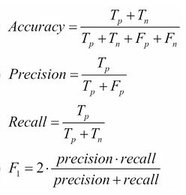

In [ ]:
f, ax = plt.subplots(figsize = (4,6))
ax.set_title('Number Scores')
sns.heatmap(scores_frame, annot=True, fmt=".3f", linewidths=0.5, cmap="PuBu", cbar=True, ax=ax)
bottom, top = ax.get_ylim()
plt.ylabel("")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### **Evaluate with Another Dataset** <a id="275"></a>
<mark>[Return Contents](#0)

In [ ]:
raw_dig = pd.read_csv("../input/Kannada-MNIST/Dig-MNIST.csv")
raw_dig.head()
x_dig = raw_dig.iloc[:, 1:].values.astype('float32') / 255
y_dig = raw_dig.iloc[:, 0].values

x_dig = x_dig.reshape(-1,28,28,1)
y_dig = to_categorical(y_dig)
model.evaluate(x_dig, y_dig, verbose=2)

### **Submit for Competition** <a id="276"></a>
<mark>[Return Contents](#0)

In [ ]:
sample_sub=pd.read_csv('../input/Kannada-MNIST/sample_submission.csv')
raw_test_id=raw_test.id
raw_test=raw_test.drop("id",axis="columns")
raw_test=raw_test / 255
test=raw_test.values.reshape(-1,28,28,1)
test.shape

In [ ]:
sub=model.predict(test)     ##making prediction
sub=np.argmax(sub,axis=1) ##changing the prediction intro labels

sample_sub['label']=sub
sample_sub.to_csv('submission.csv',index=False)

# **Conclusion** <a id="276"></a>
<mark>[Return Contents](#0)
<font color='green'>
* Please do not hesitate to comment and ask questions.
* If you found it useful, I would appreciate it if you upvote    
    
 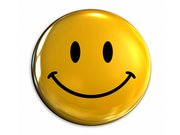
